In [1]:
import numpy as np
import csv
import pandas as pd
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.utils.data as Data
import torchvision

In [10]:
from sklearn.model_selection import train_test_split
 #首先，读取.CSV文件成矩阵的形式。
my_matrix = np.loadtxt(open("results.csv"),delimiter=",",skiprows=0)
#print(my_matrix)
 #对于矩阵而言，将矩阵倒数第一列之前的数值给了X（输入数据），将矩阵大最后一列的数值给了y（标签）
#X, y = my_matrix[:,:-1],my_matrix[:,-1]
 #利用train_test_split方法，将X,y随机划分问，训练集（X_train），训练集标签（X_test），测试卷（y_train），
 #测试集标签（y_test），安训练集：测试集=7:3的
 #概率划分，到此步骤，可以直接对数据进行处理
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)
 #此步骤，是为了将训练集与数据集的数据分别保存为CSV文件
 #np.column_stack将两个矩阵进行组合连接
#train= np.column_stack((X_train,y_train))
 #numpy.savetxt 将txt文件保存为.csv结尾的文件
#np.savetxt('train_usual.csv',train, delimiter = ',')
#test = np.column_stack((X_test, y_test))
#np.savetxt('test_usual.csv', test, delimiter = ',')

In [46]:
data0 =my_matrix[:150]
data1 =my_matrix[150:300]
data2 =my_matrix[300:402]
data3 =my_matrix[402:539]
data4 =my_matrix[539:689]
data5 =my_matrix[689:839]
data6 =my_matrix[839:989]
data7 =my_matrix[989:1139]
data00 = data0[:50]
data01 = data0[50:100]
data02 = data0[100:]
data10 = data1[:50]
data11 = data1[50:100]
data12 = data1[100:]
data20 = data2[:50]
data21 = data2[50:100]
data22 = data2[100:]
data30 = data3[:33]
data31 = data3[33:66]
data32 = data3[66:99]
data40 = data4[:40]
data41 = data4[40:80]
data42 = data4[80:120]
data50 = data5[:50]
data51 = data5[50:100]
data52 = data5[100:]
data60 = data6[:50]
data61 = data6[50:100]
data62 = data6[100:]
data70 = data7[:50]
data71 = data7[50:100]
data72 = data7[100:]
datab0 = np.vstack((data00,data10,data20,data30,data40,data50,data60,data70))
datab1 = np.vstack((data01,data11,data21,data31,data41,data51,data61,data71))
datab2 = np.vstack((data02,data12,data22,data32,data42,data52,data62,data72))


train = np.vstack((datab1,datab2))
test = datab0
X_train, y_train = train[:,:-1],train[:,-1]
X_test, y_test = test[:,:-1],test[:,-1]


In [47]:
torch_x = torch.from_numpy(X_train)
torch_y = torch.from_numpy(y_train)
test_x = torch.from_numpy(X_test)
test_y = torch.from_numpy(y_test)
y_train = torch.tensor(torch_y, dtype=torch.long)
y_test = torch.tensor(test_y,dtype = torch.long)
x_test = torch.tensor(test_x , dtype=torch.float32)
x_train = torch.tensor(torch_x, dtype=torch.float32)



D:\softwares\Program Files\Python37\lib\site-packages\ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """
D:\softwares\Program Files\Python37\lib\site-packages\ipykernel_launcher.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  
D:\softwares\Program Files\Python37\lib\site-packages\ipykernel_launcher.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  import sys
D:\softwares\Program Files\Python37\lib\site-packages\ipykernel_launcher.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sou

In [48]:
#Hyper parameters
EPOCH = 50
BATCH_SIZE = 50
TIME_STEP = 20
INPUT_SIZE = 60
LR = 0.01

In [49]:
x_test = x_test.reshape(x_test.shape[0], TIME_STEP, INPUT_SIZE)
x_train = x_train.reshape(x_train.shape[0], TIME_STEP, INPUT_SIZE)
#print(x_train.shape,x_test.shape)
torch_dataset = Data.TensorDataset(x_train,y_train )
train_loader = Data.DataLoader(dataset= torch_dataset, batch_size=BATCH_SIZE, shuffle=True,num_workers=2)
#print(x_train,x_test)

In [50]:
class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()

        self.rnn = nn.LSTM(         # if use nn.RNN(), it hardly learns
            input_size=INPUT_SIZE,
            hidden_size=64,         # rnn hidden unit
            num_layers=3,           # number of rnn layer
            batch_first=True,       # input & output will has batch size as 1s dimension. e.g. (batch, time_step, input_size)
        )

        self.out = nn.Linear(64, 8)

    def forward(self, x):
        # x shape (batch, time_step, input_size)
        # r_out shape (batch, time_step, output_size)
        # h_n shape (n_layers, batch, hidden_size)
        # h_c shape (n_layers, batch, hidden_size)
        r_out, (h_n, h_c) = self.rnn(x, None)   # None represents zero initial hidden state

        # choose r_out at the last time step
        out = self.out(r_out[:, -1, :])
        return out

In [51]:
rnn =  RNN()
print(rnn)
optimizer = torch.optim.Adam(rnn.parameters(), lr = LR)
loss_func = torch.nn.CrossEntropyLoss()

RNN(
  (rnn): LSTM(60, 64, num_layers=3, batch_first=True)
  (out): Linear(in_features=64, out_features=8, bias=True)
)


In [52]:
EP=[]
ep =0
ACC=[]
Loss_RNN = []
Times = []
times = 0
for epoch in range(EPOCH):
    for step, (x, y) in enumerate(train_loader):   # gives batch data, normalize x when iterate train_loader
        b_x = Variable(x.view(-1,TIME_STEP,INPUT_SIZE))   # batch x
        b_y = Variable(y)   # batch y
        
        output = rnn(b_x)
        loss = loss_func(output, b_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        Loss_RNN.append(loss.data)
        times += 1
        Times.append(times)
        
        if step % 50 == 0:
            EP.append(ep)
            train_output = rnn(x_train)
            pred_y = torch.max(train_output, 1)[1].data.squeeze()
            train_accuracy = (pred_y == y_train).sum().item() / float(y_train.size(0))
            ep += 1
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data,'| train accuracy: %.2f' % train_accuracy)
        
        #test_output = rnn(x_test)                   # (samples, time_step, input_size)
        #pred_y = torch.max(test_output, 1)[1].data.squeeze()
        #test_accuracy = (pred_y == y_test).sum().item() / float(y_test.size(0))
        
        test_output = rnn(x_test)
        pred_y = torch.max(test_output, 1)[1].data.squeeze()
        
        #print(y_test[100])
        num = [50,50,50,33,40,50,50,50]
        
        acc_list = []
        
        #y_test = y_test.numpy()
        #print(y_test[0:50])
        pred_y = pred_y.numpy()
        #print(pred_y[0:50])
        for i in num:
            round_ = 0
            times_ = 0
            for j in range(i):
                
                if pred_y[round_ + j] == y_test[round_ + j]:
                    times_ += 1
            #print(times)
            acc_list.append( times_ / i  )
            
            round_ += i
        
        #print(acc_list)
        final = 0
        
        for i in acc_list:
            final += i
        final = final / 8
        
        #print(final)
        #accuracy = (pred_y == y_test).sum().item() / float(y_test.size(0))
        ACC.append(final)
        if step % 50 == 0:
            print('|test accuracy:' + str(final))
        #ACC.append(test_accuracy)
        
        
        
        

Epoch:  0 | train loss: 2.0816 | train accuracy: 0.11
|test accuracy:0.0
Epoch:  1 | train loss: 2.1072 | train accuracy: 0.14
|test accuracy:0.0
Epoch:  2 | train loss: 2.0013 | train accuracy: 0.29
|test accuracy:0.7109848484848486
Epoch:  3 | train loss: 1.3818 | train accuracy: 0.46
|test accuracy:0.5414204545454546
Epoch:  4 | train loss: 1.3636 | train accuracy: 0.50
|test accuracy:0.8567992424242423
Epoch:  5 | train loss: 0.7790 | train accuracy: 0.70
|test accuracy:0.3837310606060606
Epoch:  6 | train loss: 0.7737 | train accuracy: 0.70
|test accuracy:0.1934280303030303
Epoch:  7 | train loss: 0.4540 | train accuracy: 0.79
|test accuracy:0.3906439393939394
Epoch:  8 | train loss: 0.4651 | train accuracy: 0.83
|test accuracy:0.4275568181818182
Epoch:  9 | train loss: 0.6636 | train accuracy: 0.80
|test accuracy:0.5195075757575758
Epoch:  10 | train loss: 0.4861 | train accuracy: 0.89
|test accuracy:0.46068181818181814
Epoch:  11 | train loss: 0.4073 | train accuracy: 0.85
|test

In [53]:
#datab0
test_output = rnn(x_test)
pred_y = torch.max(test_output, 1)[1].data.squeeze()

print(y_test[100])
num = [50,50,50,33,40,50,50,50]

acc_list = []

#y_test = y_test.numpy()
print(y_test[0:50])
pred_y = pred_y.numpy()
print(pred_y[0:50])
for i in num:
    round_ = 0
    times = 0
    for j in range(i):
        
        if pred_y[round_ + j] == y_test[round_ + j]:
            times += 1
    print(times)
    acc_list.append( times / i  )
    
    round_ += i

print(acc_list)
final = 0

for i in acc_list:
    final += i
final = final / 8

print(final)
    

tensor(2)
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0])
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
50
50
50
33
40
50
50
50
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
1.0


In [28]:
#datab1
test_output = rnn(x_test)
pred_y = torch.max(test_output, 1)[1].data.squeeze()

print(y_test[100])
num = [50,50,50,33,40,50,50,50]

acc_list = []

#y_test = y_test.numpy()
print(y_test[0:50])
pred_y = pred_y.numpy()
print(pred_y[0:50])
for i in num:
    round_ = 0
    times = 0
    for j in range(i):
        
        if pred_y[round_ + j] == y_test[round_ + j]:
            times += 1
    print(times)
    acc_list.append( times / i  )
    
    round_ += i

print(acc_list)
final = 0

for i in acc_list:
    final += i
final = final / 8

print(final)
    

tensor(2)
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0])
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
50
50
50
33
40
50
50
50
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
1.0


In [20]:
#datab2
test_output = rnn(x_test)
pred_y = torch.max(test_output, 1)[1].data.squeeze()

print(y_test[100])
num = [50,50,50,33,40,50,50,50]

acc_list = []

#y_test = y_test.numpy()
print(y_test[0:50])
pred_y = pred_y.numpy()
print(pred_y[0:50])
for i in num:
    round_ = 0
    times = 0
    for j in range(i):
        
        if pred_y[round_ + j] == y_test[round_ + j]:
            times += 1
    print(times)
    acc_list.append( times / i  )
    
    round_ += i

print(acc_list)
final = 0

for i in acc_list:
    final += i
final = final / 8

print(final)
    

tensor(2)
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0])
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 7 7 7 0 7 7 7
 7 7 0 0 0 0 0 0 0 0 0 0 0]
42
42
42
30
32
42
42
42
[0.84, 0.84, 0.84, 0.9090909090909091, 0.8, 0.84, 0.84, 0.84]
0.8436363636363636


In [54]:
final = (1+1+0.84)/3
final

0.9466666666666667

In [ ]:
plt.plot(Times,Loss_RNN)
plt.show()
np.save('Loss_RNNfully.npy', Loss_RNN)

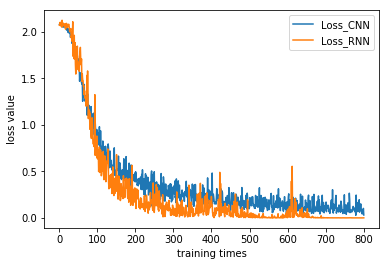

In [21]:
Loss_CNN = np.load('Loss_CNNfull.npy')
#print(Loss_CNN)
plt.plot(Times,Loss_CNN,label = 'Loss_CNN')
plt.plot(Times,Loss_RNN,label = 'Loss_RNN')
plt.xlabel('training times')
plt.ylabel('loss value')
#plt.title('')
plt.legend()
plt.savefig('Lossfull.tif', dpi = 400)

plt.show()


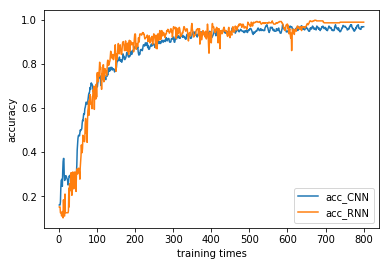

In [22]:
acc_CNN = np.load('acc_CNNfull.npy')
#print(len(acc_CNN),len(ACC),times)
plt.plot(Times,acc_CNN,label = 'acc_CNN')
plt.plot(Times,ACC,label = 'acc_RNN')
plt.xlabel('training times')
plt.ylabel('accuracy')
#plt.title('')
plt.legend()
plt.savefig('accfull.tif', dpi = 400)

plt.show()

In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt

In [24]:
# 预测数据，predict之后的预测结果集
guess = pred_y.numpy()
# 真实结果集
fact = y_test.numpy()
# 类别
classes = list(set(fact))
# 排序，准确对上分类结果
classes.sort()
# 对比，得到混淆矩阵
confusion = confusion_matrix(guess, fact)



In [25]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
print(accuracy_score(fact,guess),recall_score(fact, guess,average='macro'))

0.9883040935672515 0.9876068376068377


In [26]:
acc = float(accuracy_score(fact,guess))
recall = float(recall_score(fact, guess,average='macro'))


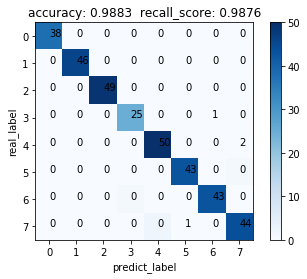

In [28]:
# 热度图，后面是指定的颜色块，gray也可以，gray_x反色也可以
plt.imshow(confusion, cmap=plt.cm.Blues)
# 这个东西就要注意了
# ticks 这个是坐标轴上的坐标点
# label 这个是坐标轴的注释说明
indices = range(len(confusion))
# 坐标位置放入
# 第一个是迭代对象，表示坐标的顺序
# 第二个是坐标显示的数值的数组，第一个表示的其实就是坐标显示数字数组的index，但是记住必须是迭代对象
plt.xticks(indices, classes)
plt.yticks(indices, classes)
# 热度显示仪？就是旁边的那个验孕棒啦
plt.colorbar()
# 就是坐标轴含义说明了
plt.xlabel('predict_label')
plt.ylabel('real_label')
plt.title('accuracy: 0.9883  recall_score: 0.9876')
# 显示数据，直观些
for first_index in range(len(confusion)):
    for second_index in range(len(confusion[first_index])):
        plt.text(first_index, second_index, confusion[first_index][second_index])
plt.savefig('RNN_results.tif', dpi = 400)
plt.show()